# Graded Challenge 3 Phase 1

## Introduction

Nama  : Fitri Octaviani

Batch : HCK-006

## Objective

Menerapkan model machine learning berbasis Random Forest dan salah satu algoritma boosting (Gradient Boosting) untuk memprediksi kelangsungan hidup seseorang.

## About the Data

Dataset yang saya peroleh melalui bigquery-public-data. Untuk mendapatkan data tersebut :
- Project ID : ftds-hacktiv8-project
- Dataset Name : phase1_ftds_006_hck
- Table Name : heart-failure

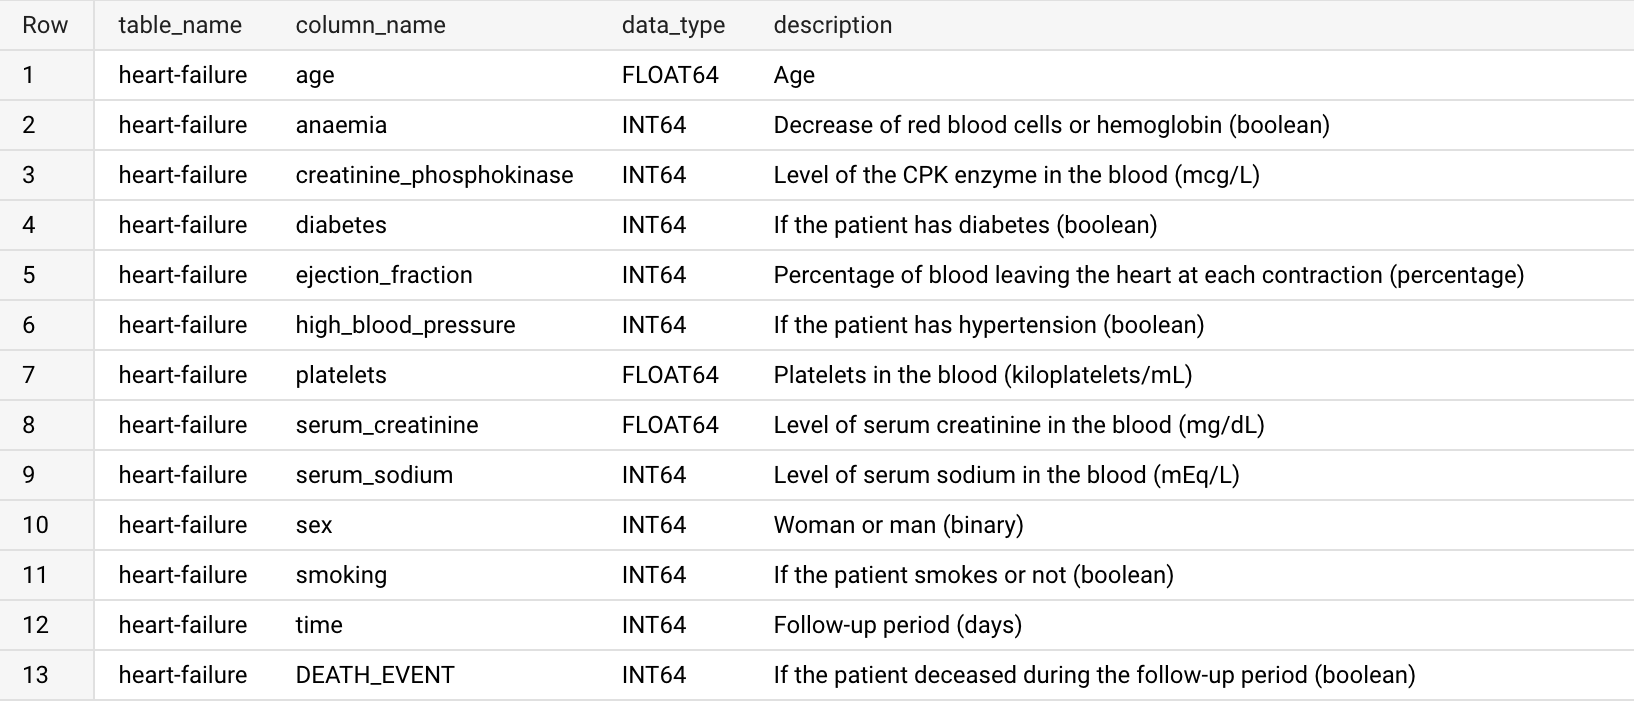

## SQL Query


```
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_006_hck.heart-failure`
```




# Import Library

In [1]:
!pip install feature_engine

In [2]:
!pip install scikit-learn

In [3]:
# import library yang dibutuhkan
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy  as np
import seaborn as sns; sns.set()
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.utils import resample,shuffle
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [4]:
df = pd.read_csv('/content/sample_data/h8dsft_P1G3_Fitri Octaviani.csv')

In [5]:
# menampilkan data teratas
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [6]:
# menampilkan data terbawah
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dataset ini berisi 299 dari 13. Dari 299 data ini kita dapat lihat tidak terdeteksi adanya missing value pada semua deatures. Features value data berupa numerical dengan tipe int64 dan float. Dalam feature tersebut terdapat deature categorical (dengan value integer) yaitu anaemia, diabetes, high_blood_pressure, sex, smking. Dalam kolom target pun DEATH_EVENT juga termasuk kategori, dimana value 0 tidak meninggal dan value 1 menandakan meninggal.

In [8]:
# menampilkan missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak adanya missing value dalam semua kolom

In [9]:
# cek duplikat data
df.duplicated().sum()

0

Tidak adanya jumlah duplikat.

In [10]:
# melihat list kolom yang memiliki nilai sebagai kategori
cat_cols = list(df.select_dtypes(include='object'))
cat_cols

[]

In [11]:
# melihat list kolom yang memiliki nilai sebagai numerikal
num_cols = df.describe().columns.tolist()
num_cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

Dalam dataset asli memang semua kolom merupakan numerikal, akan tetapi terdapat beberapa kolom yang merupakan represntasi dari kategorikal, sehingga akan di handling nanti.

In [12]:
# numerical overview
for i in num_cols:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  age
Total unique labels:  47
------------------------------
Column:  anaemia
Total unique labels:  2
------------------------------
Column:  creatinine_phosphokinase
Total unique labels:  208
------------------------------
Column:  diabetes
Total unique labels:  2
------------------------------
Column:  ejection_fraction
Total unique labels:  17
------------------------------
Column:  high_blood_pressure
Total unique labels:  2
------------------------------
Column:  platelets
Total unique labels:  176
------------------------------
Column:  serum_creatinine
Total unique labels:  40
------------------------------
Column:  serum_sodium
Total unique labels:  27
------------------------------
Column:  sex
Total unique labels:  2
------------------------------
Column:  smoking
Total unique labels:  2
------------------------------
Column:  time
Total unique labels:  148
------------------------------
Column:  DEATH_EVENT
Total unique labels:  2
------------------------------


In [13]:
df.shape

(299, 13)

Dalam dataset ini terdapat 299 baris dan 13 kolom.

In [14]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Berdasarkan data diatas tercatat bahwa rata-rata pasien berumur 60 tahun, dengan pasien termuda umur 40 tahun dan yang tertua umur 95 tahun. Dalam feature kategorikal seperti anaemia, diabetes, high_blood_pressure, sex dan smoking memiliki value minimum 0 dan maksimum 1.

In [15]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

Dalam kolom target sebenarnya merupakan kolom kaegorikal yang telah di encode menjadi numerikal. Dalam hal ini, 0 merupakan orang yang tidak meninggal dan 1 merupakan orang yang meninngal.

# Exploratory Data Analysis

In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


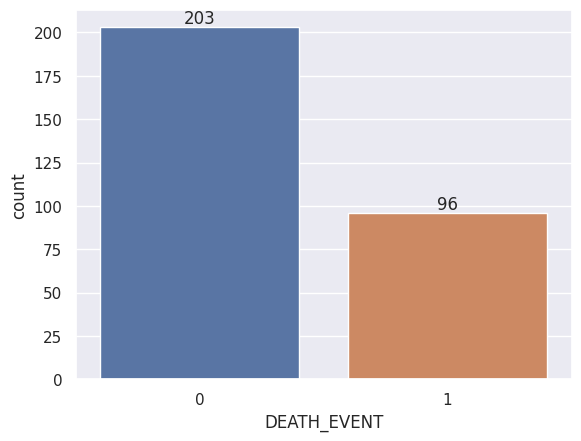

In [17]:
# plot perbandingan pasien yang meninggal dan selamat
ax = sns.countplot(x=df.DEATH_EVENT, data=df)
ax.bar_label(ax.containers[0])
plt.show()

Berdasarkan bar chart di atas, dataset dengan value 0 jauh lebih banyak dibanding value 1. Sehingga terlihat pada kolom yang akan menjadi target memiliki **class imbalance**. Dalam dataset tersebut berarti bahwa orang yang tidak meninggal berjumlah 203 dan orang yang meninggal berjumlah 96.

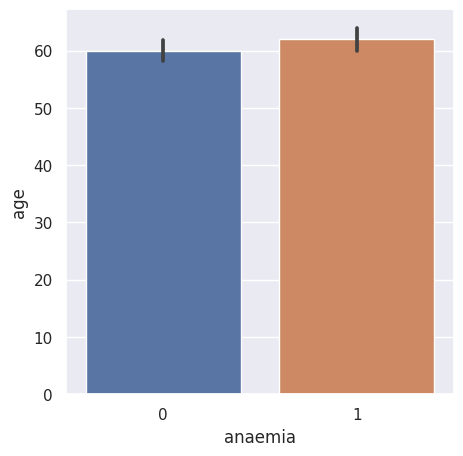

In [18]:
#see anaemia based age
plt.figure(figsize=(5, 5))
sns.barplot(x='anaemia', y='age', data=df)
plt.show()

Berdasarkan hasil bar di atas dapat dilihat bahwa mean age pasien yang mengalami anaemia maupun yang tidak hampir memiliki jumlah yang sama. Dan mean dari age tersebut sekitar 60tahun lebih.

[]

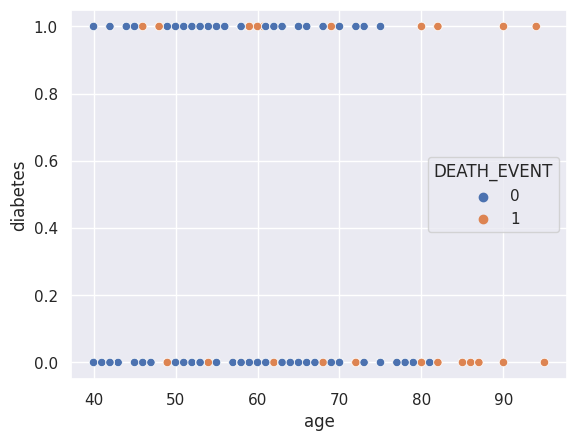

In [19]:
# plot hubungan antara umur dan diabetes terhadap kematian
sns.scatterplot(data=df, x='age', y='diabetes', hue='DEATH_EVENT')
plt.plot()

Dari grafik diatas terlihat bahwa diabetes menjadi faktor kematian pada usia lebih awal dari pasien yang tidak menderita diabetes.

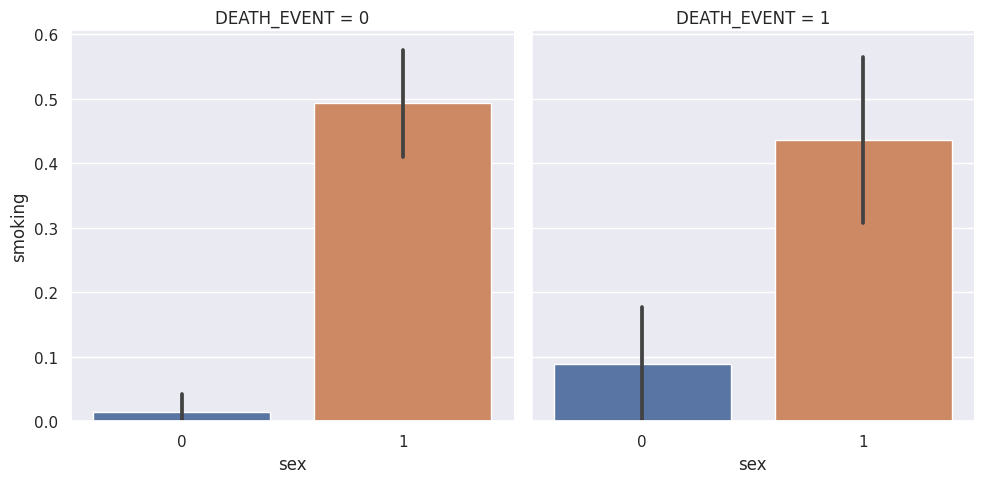

In [20]:
sns.catplot(x="sex", y='smoking', col="DEATH_EVENT",
                data=df, kind="bar")

Dari grafik diatas terlihat bahwa value sex 0 memiliki proporsi auh lebih kecil dibanding value sex 1. Diduga bahwa value sex 0 menandakan female, dan 1 menandakan male. Baik sex dan smoking nampak tidak begitu berpengaruh terhadap status kematian.

# Feature Engineering

<Axes: >

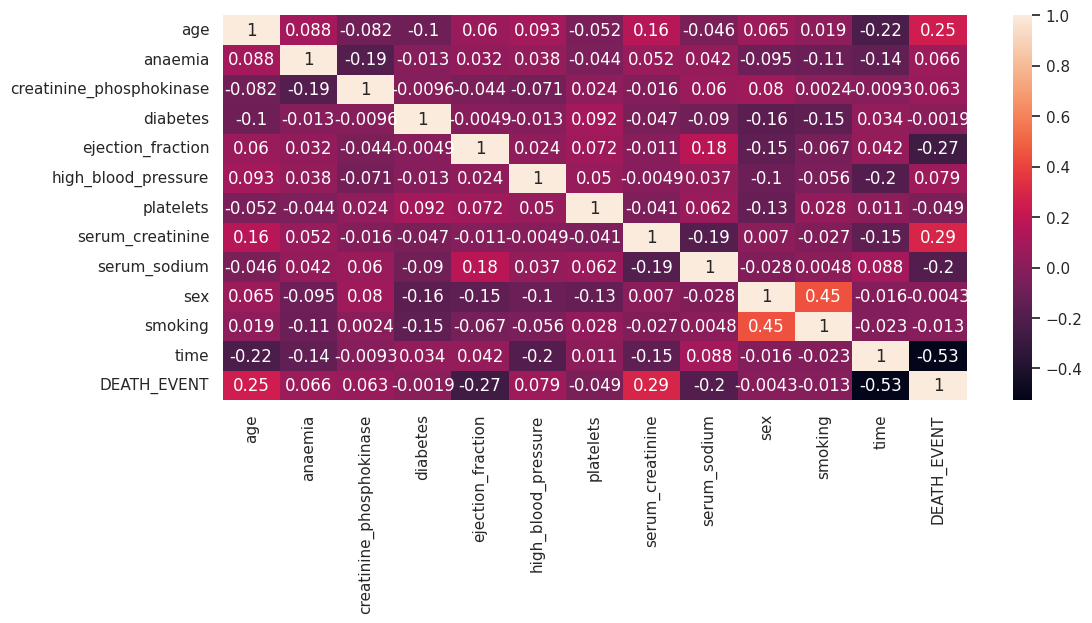

In [21]:
# cek korelasi antar kolom menggunakan metode pearson
cor = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(cor, annot=True)

In [22]:
# cek korelasi yang memiliki signifikansi terhadap DEATH_EVENT
df.corr().DEATH_EVENT.sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

**Feature Selection**

Berdasarkan nilai korelasi tersebut, terdapat beberapa feature yang mempunyai korelasi tinggi, diantaranya serum_creatinine, age, high_blood_pressure, anaemia, dan creatinine_phosphokinase.

Korelasi positif terhadap target status kematian menandakan apabila value tersebut meningkat maka meningkat pula kemungkinan meninggal atau sebaliknya. Feature seperti serum_creatine dan age terlihat masuk akal dengan korelasi positif. Sebagai contohnya, semakin tua umur pasien maka kemungkinan meninggalnya semakin besar.

Sisa feature yang lainnya memiliki korelasi dibawah 0.1 terhadap target 'death_event' Sebagaimana sudah diamati sebelumnya bahwa memang terlihat jelas proporsi smoking male jauh lebih besar daripada female.


In [23]:
# drop kolom yang korelasinya rendah
df.drop(columns = ['time', 'ejection_fraction', 'serum_sodium', 'platelets', 'smoking', 'sex', 'diabetes'], inplace=True)

In [24]:
# menyimpan semua fitur dalam sebuah list
all_features = df.columns.tolist()

In [25]:
# menampilkan selected features
selected_feature = all_features
selected_feature

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'high_blood_pressure',
 'serum_creatinine',
 'DEATH_EVENT']

In [26]:
# simpan df dengan fitur yang sudah diseleksi
df_selected = df[selected_feature].copy()

In [27]:
df_selected.head()

,age,anaemia,creatinine_phosphokinase,high_blood_pressure,serum_creatinine,DEATH_EVENT
0,42.0,1,250,0,1.3,1
1,46.0,0,168,1,2.1,1
2,65.0,1,160,0,2.7,1
3,53.0,1,91,1,1.4,1
4,50.0,1,582,1,1.0,0


Seperti yang sudah di jelaskan sebelumnya bahwa terdapat beberapa kolom yang berkategori numerikal dan kategorikal.

In [28]:
# kolom untuk numerikal
scaled_num_col = ['age', 'creatinine_phosphokinase', 'serum_creatinine']
scaled_num_col

['age', 'creatinine_phosphokinase', 'serum_creatinine']

In [29]:
# kolom untuk kategorikal
cat_col = ['anaemia','high_blood_pressure']
cat_col

['anaemia', 'high_blood_pressure']

Dalam kategorikal, value anaemia 0 dan 1, dimana 1 adalah terdeteksi anaemia dan 0 adalah tidak terdeteksi anaemia. Lalu untuk kolom high_blood_pressure, value 1 merupakan represntasi dari hipertensi dan 0 tidak hipertensi.

## Train Test Split

In [30]:
#split antara fitur dan target
X = df_selected.drop('DEATH_EVENT',axis=1)
y = df_selected['DEATH_EVENT']

In [31]:
# split antara train dan test dengan cara stratifikasi
df_train, df_test = train_test_split(df_selected, stratify=y,test_size=0.3, random_state=42)

print(f'train size: {df_train.shape}')
print(f'test size: {df_test.shape}')

train size: (209, 6)
test size: (90, 6)


Dalam train test ini data akan dibagi menjadi 70% untuk data train dan 30% untuk data test. Dari hasil tersebut maka didapatkan untuk train sebanyak 209 baris dan 6 kolom, untuk data test sebanyak 90 baris dan 6 kolom.

In [32]:
# menampilkan 5 feature teratas data train
df_train.head()

,age,anaemia,creatinine_phosphokinase,high_blood_pressure,serum_creatinine,DEATH_EVENT
230,90.0,1,47,1,2.10,1
254,70.0,0,66,0,0.80,0
62,46.0,0,719,1,1.18,0
147,64.0,0,143,0,2.40,0
258,60.0,1,1082,0,6.10,0


## Handling Outlier

Dalam tahap ini akan dilakukan handling putlier pada kolom numerikal kontinu dengan melihat distribusi dan outlier.

In [33]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

    # histogram
    sns.histplot(df[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5)
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [34]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

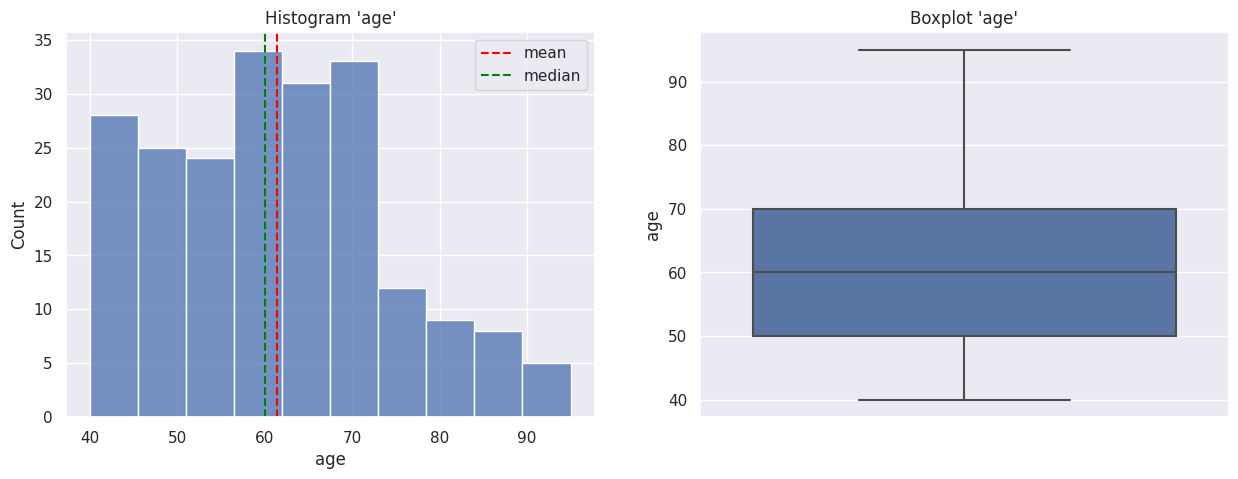

age Kurtosis: -0.3036080263258061
age Skewness: 0.38885482603753013
Columns 'age' is normally distributed


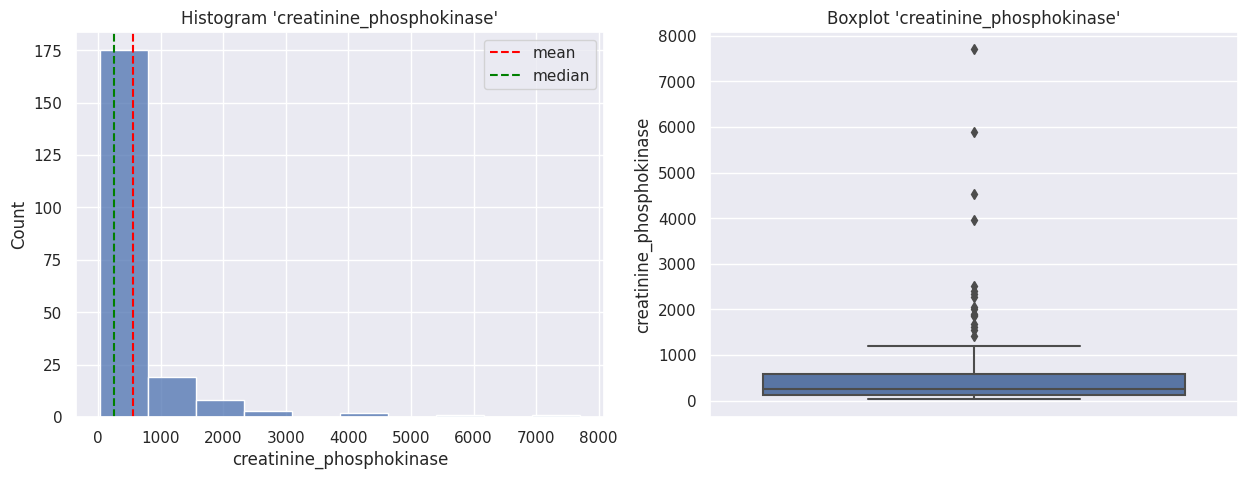

creatinine_phosphokinase Kurtosis: 30.172029181812974
creatinine_phosphokinase Skewness: 4.80099789179221
Columns 'creatinine_phosphokinase' is highly right skewed


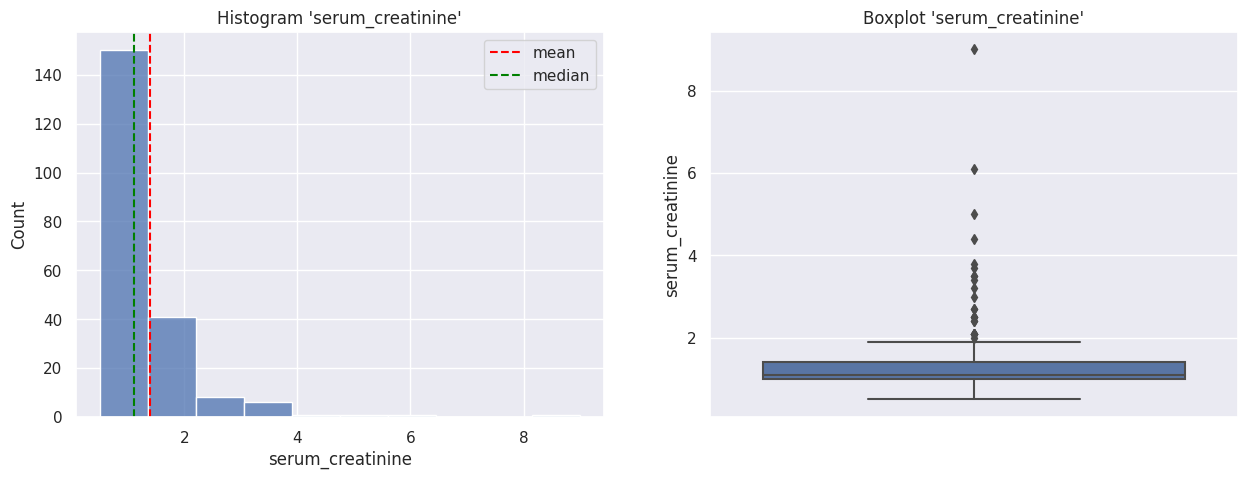

serum_creatinine Kurtosis: 27.37349666020198
serum_creatinine Skewness: 4.376788921125964
Columns 'serum_creatinine' is highly right skewed


In [35]:
# plot semua fitur pada data train yang numerik
for i in range(len(scaled_num_col)):
    plot_diagnostic(df_train, scaled_num_col[i])

In [36]:
# outlier detection in creatinine_phosphokinase
Q1 = df_train['creatinine_phosphokinase'].quantile(.25)
Q3 = df_train['creatinine_phosphokinase'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = df_train[(df_train['creatinine_phosphokinase'] <= lower) | (df_train['creatinine_phosphokinase'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  3.3444816053511706 %
upper:  1962.0
lower:  -1258.0


In [37]:
# outlier detection in serum_creatinine
Q1 = df_train['serum_creatinine'].quantile(.25)
Q3 = df_train['serum_creatinine'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = df_train[(df_train['serum_creatinine'] <= lower) | (df_train['serum_creatinine'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  4.3478260869565215 %
upper:  2.5999999999999996
lower:  -0.19999999999999973


Pada kolom numerikal, kolom yang memiliki outlier adalah creatinine_phosphokinase dengan nilai skew nya 4.8 dan kolom serum_creatinine dengan skew 4.3 sehingga dalam hal ini akan dilakukan handling outlier menggunakan metode censoring/capping

In [38]:
# define kolom
cens_col = ['creatinine_phosphokinase', 'serum_creatinine']

# create the capper
winsorizer = Winsorizer(capping_method='iqr',
                        tail = 'both',
                        fold = 1.5,
                        variables=cens_col)

# melakukan capping pada data train
df_train = winsorizer.fit_transform(df_train)

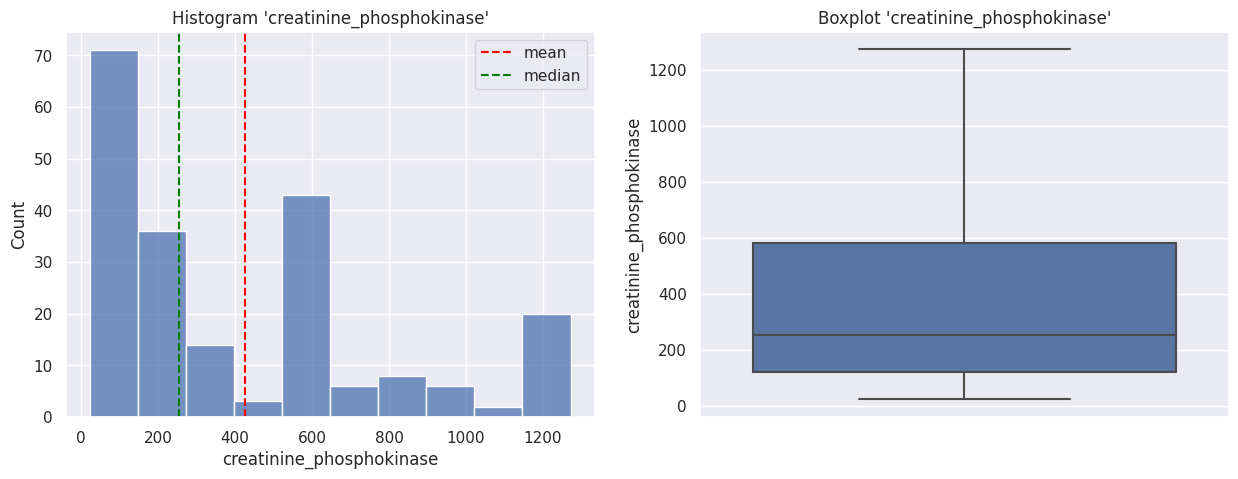

creatinine_phosphokinase Kurtosis: -0.08032172436756113
creatinine_phosphokinase Skewness: 0.9912067457480686
Columns 'creatinine_phosphokinase' is moderately right skewed


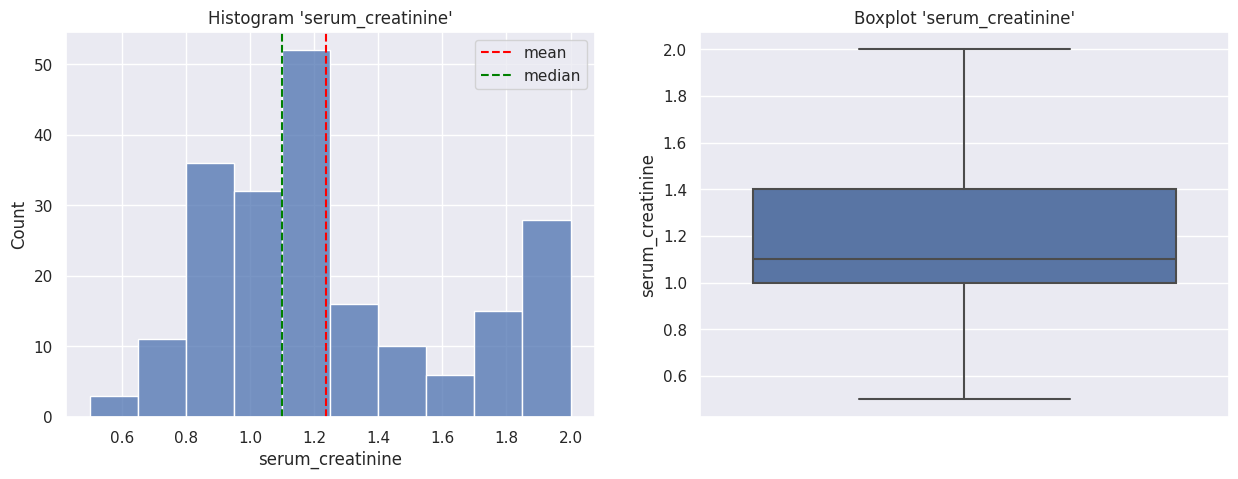

serum_creatinine Kurtosis: -0.5839798311646036
serum_creatinine Skewness: 0.7013791414970805
Columns 'serum_creatinine' is moderately right skewed


In [39]:
# plot fitur setelah dilakukkan capping
for i in range(len(cens_col)):
    plot_diagnostic(df_train, cens_col[i])

Setelah di handling maka kolom creatinine_phosphokinase dan serum_creatinine sudah tidak memiliki outliers.

# Preprocessing

## Handling Class Imbalance

Dalam handling class imbalance menggunakan teknik SMOTE

In [40]:
# train-test tanpa handling imbalance
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [41]:
df_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'high_blood_pressure',
       'serum_creatinine', 'DEATH_EVENT'],
      dtype='object')

In [42]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE (sampling_strategy='minority')
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [43]:
# gabungan data train smote dengan target
df_train_smote = X_smote.copy()
df_train_smote['DEATH_EVENT'] = y_smote

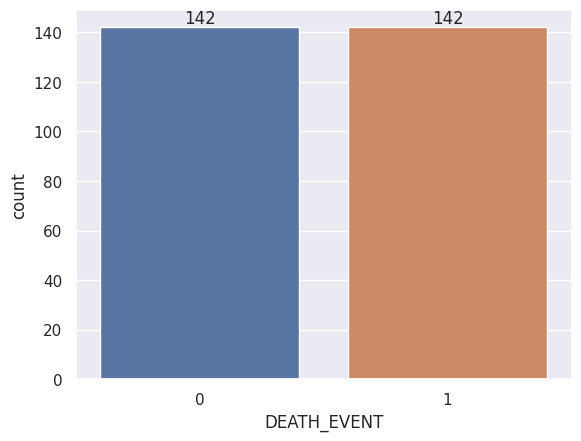

In [44]:
# plot perbandingan jumlah target setelah handling class imbalance
ax = sns.countplot(x=df_train_smote.DEATH_EVENT, data=df_train_smote)
ax.bar_label(ax.containers[0])
plt.show()

Dalam data target yang semula mengalami class imbalance dimana value 0 berjumlah 203 dan value 1 berjumlah 96. Maka menjadi balance dengan masing-masing value berjumlah 142.

## Pipeline

Dalam kolom numerikal, outlier yang digunakan adalah winsorizer, imputer missing value yang digunakan adalah median, dan scaler menggunakan minmaxscaler karena distribusinya tidak normal.

Pada kolom kategorikal akan dilakukan encoding menggunakan OrdinalEncoder karena kolom tersebut merupakan boolean value (1 dan 0).

Lalu hasil dari pipeline kedua kategori tersebut akan digabungkan ke dalam column transformer dengan variabel bernama preprocess1.

In [45]:
scaled_num_col

['age', 'creatinine_phosphokinase', 'serum_creatinine']

In [46]:
cat_col

['anaemia', 'high_blood_pressure']

In [47]:
num_pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both')),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler(), scaled_num_col)
])

cat_pipe = Pipeline([
        ('encoding', OrdinalEncoder(), cat_col)
])

preprocess1 = ColumnTransformer(
    transformers=[
        ("scaler", MinMaxScaler(), scaled_num_col),
        ('encoding', OrdinalEncoder(), cat_col)
    ])

# Model Definition

Model yang saya pakai adalah Random Forest dan Gradient Boosting untuk memprediksi target. Saya akan melakukan training data pada semua model terlebih dahulu dengan parameter default menggunakan cross validation. Kemudian kedua model tersebut akan dipilih dan dilakukan hyperparameter tuning, dan yang terakhir adalah hasil train test setelah dilakukan tuning.

Metrics yang saya gunakan untuk mengevaluasi model adalah recall. Mengingat bahwa data sebenarnya tergolong imbalanced dan prioritas adalah meminimalisir false negative kelas 1. Sebagaimana recall adalah perbandingan jumlah prediksi kelas positif terhadap jumlah aktual positif. Dalam kasus recall ini, konteks prediksi seseorang yang meninggal namun diprediksi tidak meninggal.



In [48]:
rf_model = RandomForestClassifier(random_state=42)
gbc_model = GradientBoostingClassifier(random_state=42)

# Model Training

## Random Forest & Gradient Boosting Classifier

In [49]:
# model menggunakan pipeline
rf_pipe = Pipeline([
        ('preprocess', preprocess1),
        ('model', RandomForestClassifier(random_state=42))
    ])

gb_pipe = Pipeline([
        ('preprocess', preprocess1),
        ('model', GradientBoostingClassifier(random_state=42))
])

In [50]:
rf_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'serum_creatinine']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['anaemia',
                                                   'high_blood_pressure'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [51]:
gb_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'serum_creatinine']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['anaemia',
                                                   'high_blood_pressure'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

In [52]:
# train data pada model decision tree
rf_pipe.fit(X_smote, y_smote)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'serum_creatinine']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['anaemia',
                                                   'high_blood_pressure'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [53]:
gb_pipe.fit(X_smote, y_smote)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'serum_creatinine']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['anaemia',
                                                   'high_blood_pressure'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

## Cross Validation

In [54]:
# set scoring
split_n = 5

# check cross validation score
rf_cv = cross_val_score(rf_pipe, X_smote, y_smote, cv=5, scoring='recall')
gb_cv = cross_val_score(gb_pipe, X_smote, y_smote, cv=5, scoring='recall')

name_model = []
score_cv = 0
for cv, name in zip([rf_cv, gb_cv], ['rf_model', 'gb_model']):
    print(name)
    print('All Cv           : ', cv)
    print('Mean CV          : ', cv.mean())
    print('Std CV           : ', cv.std())
    print('Range of Testset : ',(cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>score_cv:
        score_cv = cv.mean()
        name_model = name
    else:
        pass

rf_model
All Cv           :  [0.51724138 0.72413793 0.60714286 0.71428571 0.89285714]
Mean CV          :  0.6911330049261084
Std CV           :  0.1261829174698968
Range of Testset :  0.5649500874562117 - 0.8173159223960051
--------------------------------------------------
gb_model
All Cv           :  [0.44827586 0.5862069  0.75       0.67857143 0.89285714]
Mean CV          :  0.6711822660098522
Std CV           :  0.14987639191838567
Range of Testset :  0.5213058740914666 - 0.8210586579282378
--------------------------------------------------


Dalam kedua model tersebut, bahwa best model yang diperoleh adalah Gradient Boosting Classifier dengan nial mean 0.70. Hasil dalam kedua model ini memang terlihat perbedaan yang cukup sedikit, untuk model Random Forest memiliki nilai mean 0.69 yang berarti hanya berbeda 0.1 dengan Gradient Boosting Classifier.

## Hyperparameter Tuning

Dari model yang telah di train, saya akan melakukan tuning hyperparameter menggunakan RandomSearchCV untuk mendapatkan model yang optimal.

Dalam parameter random forest terdapat banyak sekali hyperparameter yang dapat kita tentukan. Akan tetapi disini saya hanya mengambil 4 parameter saja, diantaranya n_estimator, criterion, max_depth, dan min_sample_split

In [55]:
# set hyperparameter tuning untuk random forest
rf_param = {
    'model__n_estimators' : [100],
    'model__criterion' : ['gini'],
    'model__max_depth' : [10],
    'model__min_samples_split' : [2]
}

rf_tuning = RandomizedSearchCV(rf_pipe, param_distributions=rf_param, cv=5, scoring='recall', random_state=42)
rf_tuning.fit(X_smote, y_smote)
print('Best cross_validation random forest: ',  rf_tuning.best_score_)

Best cross_validation random forest:  0.6980295566502464


In [56]:
# predict train-set setelah tuning
rf_train = rf_tuning.predict(X_smote)
# predict test setelah tuning
rf_test = rf_tuning.predict(X_test)
# print recall score terhadap test setelah tuning
recall_score(y_true=y_test,y_pred=rf_test)

0.5862068965517241

Agar mengetahui apakah model terholong underfit, overfit atau good fit maka akan dilakukan report terhadap random forest.

In [57]:
# train
print(classification_report(y_smote, rf_train))

#test
print(classification_report(y_test, rf_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       142
           1       1.00      0.99      0.99       142

    accuracy                           0.99       284
   macro avg       0.99      0.99      0.99       284
weighted avg       0.99      0.99      0.99       284

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        61
           1       0.77      0.59      0.67        29

    accuracy                           0.81        90
   macro avg       0.80      0.75      0.77        90
weighted avg       0.81      0.81      0.80        90



Dalam train, target mencapai niali accuracy dan recall 100% . Sedangkan dalam test mencapai accuracy 79% dan recall untuk target value 0 mencapai 90% sedangkan untuk target value 1 hanya mencapai 55%. Hal ini dapat terjadi karena data termasuk class imbalanced (meskipun kita telah set berbagai parameter model dan melakukan smote).

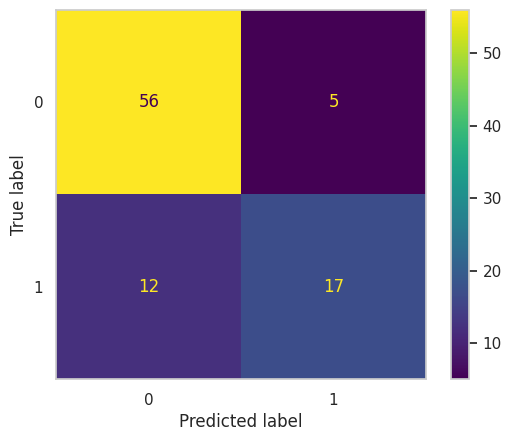

In [58]:
# confusion matrix random forest
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, rf_test, labels=rf_tuning.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_tuning.classes_)

disp.plot()
plt.show()

Dalam confusion matrix random forest terlihat bahwa ada 6 orang yang meninggal namun diprediksi tidak meninggal.

In [59]:
# set hyperparameter tuning untuk gradient boosting
gb_param = {
    'model__loss' : ['log_loss']
}

gb_tuning = RandomizedSearchCV(gb_pipe, param_distributions=gb_param, cv=5, scoring='recall')
gb_tuning.fit(X_smote, y_smote)
print('Best cross_validation random forest: ',  gb_tuning.best_score_)

Best cross_validation random forest:  0.6711822660098522


Dalam parameter gradient boosting terdapat banyak sekali hyperparameter yang dapat kita tentukan. Akan tetapi disini saya hanya mengambil 1 parameter saja, diantaranya loss.

In [60]:
# predict train-set setelah tuning
gb_train = gb_tuning.predict(X_smote)
# predict test setelah tuning
gb_test = gb_tuning.predict(X_test)
# print recall score terhadap test setelah tuning
recall_score(y_true=y_test,y_pred=gb_test)

0.5172413793103449

In [61]:
# train
print(classification_report(y_smote, gb_train))

#test
print(classification_report(y_test, gb_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       142
           1       0.99      0.94      0.96       142

    accuracy                           0.96       284
   macro avg       0.96      0.96      0.96       284
weighted avg       0.96      0.96      0.96       284

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        61
           1       0.60      0.52      0.56        29

    accuracy                           0.73        90
   macro avg       0.69      0.68      0.68        90
weighted avg       0.73      0.73      0.73        90



Dalam train, target mencapai niali accuracy 95% dan recall untuk value 0 adalah 98% dan untuk value 1 adalah 92%. . Sedangkan dalam test mencapai accuracy 77% dan recall untuk target value 0 mencapai 84% sedangkan untuk target value 1 hanya mencapai 62%.

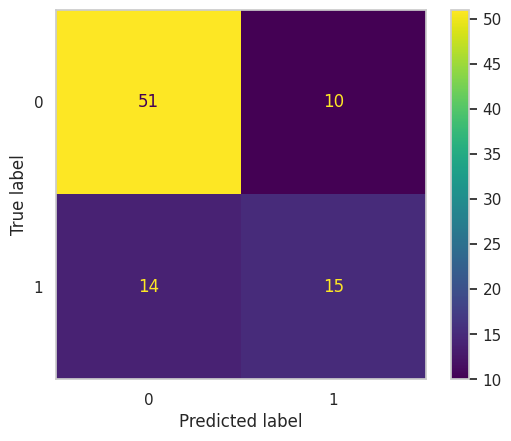

In [62]:
# confusion matrix random forest
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, gb_test, labels=gb_tuning.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb_tuning.classes_)

disp.plot()
plt.show()

Dalam confusion matrix random forest terlihat bahwa ada 10 orang yang meninggal namun diprediksi tidak meninggal.

# Model Saving

In [63]:
# save tuned-model random forest
with open('rf_tuning.pkl','wb') as file_1:
    joblib.dump(rf_tuning,file_1)


# save tuned-model gradientboost
with open('gbc_tuning.pkl','wb') as file_2:
    joblib.dump(gb_tuning,file_2)

# Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
> - Bagging (Bootstrap Aggregating) adalah salah satu teknik ensemble learning yang populer dan telah digunakan dalam berbagai algoritma pembelajaran mesin, seperti Random Forest (bagging dengan decision tree), Bagging dengan SVM (Support Vector Machines), dan sebagainya.
> - Latar belakang bangging adalah mengurangi variansi dan overfitting dala model prediktif, variansi terjadi ketika model yang dibangun terlalu sensitif terhadap variasi kecil dalam data pelatihan sehingga dapat menghasilkan prediksi yang tidak stabil pada data baru, overfitting terjadi ketika model terlalu kompleks dan menghafal data pelatihan tetapi tidak dapat umum untuk data yang belum pernah dilihat sebelumnya.
> - Cara kerja bagging dibagi menjadi 3, diantaranya (1) pembentukan kumpulan data: data pelatihan yang tersedia akan dibagi menjadi beberapa sub-kumpulan data secara acak. Proses ini menggunakan teknik pengambilan sampel dengan penggantian (bootstrap), dimana setiap sub-kumpulan memiliki ukuran yang sama dengan data pelatihan awal. (2) pembentukan model independen : untuk setiap sub-kumpulan data, model pembelajaran yang sama (misalnya decision tree) dibangun secara independen menggunakan sub-kumpulan tersebut. Masing-masing model dilatih pada sub-kumpulan data yang berbeda dan dapat memiliki variasi dalam pemilihan fitur atau parameter. (3) Prediksi dan agregasi : setelah semua model dibangun, prediksi dilakukan pada setiap model menggunakan data uji. Agregasi dilakukan pada setiap model menggunakan data uji. Agregasi dilakukan dengan menggabungkan hasil prediksi dari semua model (misalnua melalui voitng atau menghitung rata-rata) untuk menghasilkan prediksi akhir.
2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
> Algoritma boosting yang saya gunakan adalah gradient boosting classifier. Algoritma Gradient Boosting Classifier dan Random Forest adalah dua metode ensemble learning yang populer dalam machine learning.  Meskipun keduanya bertujuan untuk meningkatkan performa model dengan mengkombinasikan beberapa model prediktif, ada perbedaan dalam cara kerja dan pendekatan yang digunakan.
> - Konstruksi model. Dalam random forest, sejumlah besar decision tree dibangun secara independen. Setiap pohon memberikan prediksi dan hasil akhir dicapai melalui voting atau menghitung rata-rata prediksi pohon individu. Dalam Gradient Boosting Classifier, model dibangun secara sekuensial.  Pohon keputusan dibangun secara berurutan, dan setiap pohon berusaha memperbaiki kesalahan prediksi model sebelumnya. Prediksi akhir dihasilkan dengan menggabungkan kontribusi dari semua pohon yang dibangun.
> - Pengelompokkan Error : Dalam Random Forest, setiap pohon pada Random Forest dihasilkan secara independen, sehingga tidak ada koreksi langsung antara pohon-pohon tersebut. Pohon-pohon dapat membuat kesalahan yang serupa, tetapi tidak ada proses koreksi antara mereka. Dalam Gradient Boosting Classifier, mengikuti pendekatan koreksi berurutan. Setiap pohon berfokus pada memperbaiki residu atau gradien kesalahan yang dihasilkan oleh model sebelumnya. Dengan demikian, setiap pohon memberikan kontribusi untuk memperbaiki model secara bertahap.

# Conclusion

Pada dataset ini dilakukan dengan cara dua model yaitu Random Forest dan Gradient Boosting Classifier. Dalam dataset ini terdapat problem, diantaranya data imbalanced dan outliers.

Untuk study kasus disini adalah meminimalkan pasien yang meninggal namun terprediksi tidak meninggal (meminimalisir recall pada value 1).

Berdasarkan evaluasi, model Random Forest memiliki kurang kemampuan dalam prediksi value 1 dibanding value 0. Namun disisi lain, recall untuk datat test (92 untuk value 0, 59 untuk value 1) pada Random Forest lebih baik dibandingkan Gradient Boosting Classifier (84 untuk value 0, 52 untuk value 1). Selain itu juga accuracy dari prediksi test Random Forest (81%) lebih baik dari Gradient Boosting Classifier (73%). Dalam confusion matrix terihat bahwa random fprest hanya memiliki 5 orang yang terprediksi tidak meinggal, sedangkan dalam Gradient Boosting Classifier mencapai 10 orang yang terprediksi tidak meninggal.

Dapat disimpilkan bahwa Random Forest lebih baik dari Gradient Boosting untuk meminimalkan pasien yang meninggal namun terprediksi tidak meninggal.